Python Project - Marvet Mart Project
Brian Thomas
3/10/2021

In [488]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
pd.set_option('display.float_format', lambda x: '%.3f' % x) # converts all decimals to 3 numbers after decimal place

# useful for dark mode specifically
%config InlineBackend.print_figure_kwargs={'facecolor' : 'w'} # ensures all visualization backgrounds are white

import warnings
warnings.filterwarnings('ignore')

Part 1: Cleaning the Data

In [489]:
#This counts the amount of columns and finds the number of missing data columns
MMSales = pd.read_csv('MM_Sales.csv', sep = ',')
print(MMSales.shape)
print(MMSales.count())
print(MMSales.count()-MMSales.shape[0]) 

(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64
Region             0
Country            0
Item Type         -6
Sales Channel      0
Order Priority   -15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [490]:
#This prints out a list of all the types of data in each data column
display(MMSales.head())
print(MMSales.dtypes)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [491]:
#Since there are no NaN values in the Country column, we need to find the values that have a number as a string
print("Country Count")
print(MMSales['Country'].value_counts())

Country Count
Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Monaco                 236
Malawi                 233
437.2                    1
651.21                   1
154.06                   1
Name: Country, Length: 188, dtype: int64


In [492]:
MMSales['Country'] = MMSales['Country'].replace(to_replace = '437.2', value= 'NULL')
MMSales['Country'] = MMSales['Country'].replace(to_replace = '154.06', value= 'NULL')
MMSales['Country'] = MMSales['Country'].replace(to_replace = '651.21', value= 'NULL')
print(MMSales['Country'].value_counts())

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
NULL                     3
Name: Country, Length: 186, dtype: int64


In [493]:
#This finds where the NaN values are in the Item Type column
NULLItem = pd.isnull(MMSales['Item Type'])
MMSales[NULLItem]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
11,Middle East and North Africa,Afghanistan,NaN,Online,C,10/21/16,620358741,12/1/16,6792,437.200,263.330,2969462.400,1788537.360,1180925.040
321,Europe,France,NaN,Online,M,1/23/15,714754474,2/5/15,587,668.270,502.540,392274.490,294990.980,97283.510
14519,Central America and the Caribbean,Nicaragua,NaN,Online,H,2/21/13,391752135,3/28/13,7017,651.210,524.960,4569540.570,3683644.320,885896.250
14520,Australia and Oceania,Vanuatu,NaN,Online,M,6/3/14,282816255,6/23/14,469,154.060,90.930,72254.140,42646.170,29607.970
47186,Europe,Austria,NaN,Offline,L,5/17/11,864141499,5/24/11,7528,81.730,56.670,615263.440,426611.760,188651.680
47188,Europe,Romania,NaN,Online,M,3/31/16,818466699,5/3/16,1339,154.060,90.930,206286.340,121755.270,84531.070


In [494]:
#This replaces all NaN values with NULL in the Item Type column
MMSales['Item Type'] = MMSales['Item Type'].replace(np.NaN, value = 'NULL')
print(MMSales['Item Type'].value_counts())
print(MMSales[NULLItem])

Fruits             4221
Meat               4221
Cosmetics          4192
Vegetables         4189
Personal Care      4185
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4138
Household          4138
Baby Food          4078
NULL                  6
Name: Item Type, dtype: int64
                                  Region      Country Item Type Sales Channel  \
11          Middle East and North Africa  Afghanistan      NULL        Online   
321                               Europe       France      NULL        Online   
14519  Central America and the Caribbean    Nicaragua      NULL        Online   
14520              Australia and Oceania      Vanuatu      NULL        Online   
47186                             Europe      Austria      NULL       Offline   
47188                             Europe      Romania      NULL        Online   

      Order Priority Order Date   Order ID Ship Date  Units Sold  Unit Price  \
11        

In [495]:
#This finds where the NaN values are in the Order Priority column
NULLpriority = pd.isnull(MMSales['Order Priority'])
print(MMSales[NULLpriority])

                                  Region               Country      Item Type  \
13          Middle East and North Africa               Lebanon     Vegetables   
189                               Europe                France      Cosmetics   
259    Central America and the Caribbean                Belize         Fruits   
364                   Sub-Saharan Africa                Angola  Personal Care   
469                                 Asia            Tajikistan        Clothes   
644                   Sub-Saharan Africa               Nigeria        Clothes   
784                   Sub-Saharan Africa               Lesotho           Meat   
924         Middle East and North Africa  United Arab Emirates      Household   
1064        Middle East and North Africa          Saudi Arabia      Baby Food   
3969                  Sub-Saharan Africa            Cape Verde         Fruits   
5054        Middle East and North Africa                 Egypt      Baby Food   
5824                  Sub-Sa

In [496]:
#This replaces all values that are not C, H, M, or L with NULL values in the Order Priority column
#This will kill two birds with one stone in the sense that both NaN values as well as the other priority codes will both be changed to NULL
count = 0
for index, row in MMSales.iterrows():
    if row.loc['Order Priority'] != 'C' and row.loc['Order Priority'] != 'H' and row.loc['Order Priority'] != 'M' and row.loc['Order Priority'] != 'L':
        MMSales.loc[int(index), 'Order Priority'] = "NULL"
        print(MMSales.loc[int(index), 'Order Priority'])
        count += 1
print(f"Number of Incorrect Data is {count}")
print(MMSales['Order Priority'].value_counts())

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Number of Incorrect Data is 15
M       19887
H       15099
L        9986
C        5013
NULL       15
Name: Order Priority, dtype: int64


In [497]:
#Since there are no NaN values in the Order ID column, we need to find the values that have a string of characters rather than numbers
print(MMSales['Order ID'].value_counts())

Snacks       2
841351306    1
458900058    1
524966514    1
859008395    1
            ..
530354535    1
395619666    1
932148587    1
337019622    1
203504836    1
Name: Order ID, Length: 49999, dtype: int64


In [498]:
#This replaces all data that isn't an ID number to 0 in Order ID
MMSales['Order ID'] = MMSales['Order ID'].replace(to_replace = 'Snacks', value = '0')
print(MMSales['Order ID'].value_counts())

0            2
841351306    1
444674050    1
524966514    1
859008395    1
            ..
530354535    1
395619666    1
932148587    1
337019622    1
203504836    1
Name: Order ID, Length: 49999, dtype: int64


In [499]:
cleanMMSales = MMSales.copy()

In [500]:
cleanMMSales.fillna({'Item Type':"NULL" , 'Order Priority':"NULL"}, inplace = True)

In [501]:
#This cleans all the NULL data that we had created in all 4 columns\
cleanMMSales = cleanMMSales[cleanMMSales.Country != "NULL"]
cleanMMSales = cleanMMSales[cleanMMSales['Item Type'] != "NULL"]
cleanMMSales = cleanMMSales[cleanMMSales['Order Priority'] != "NULL"]
cleanMMSales = cleanMMSales[cleanMMSales['Order ID'] != "0"]

In [502]:
#This checks to see if the cleaning work by counting the amount of NULLs and 0s there are in the data columns we altered
print(cleanMMSales['Country'][cleanMMSales['Country'] == 'NULL'].count())
print(cleanMMSales['Item Type'][cleanMMSales['Item Type'] == 'NULL'].count())
print(cleanMMSales['Order Priority'][cleanMMSales['Order Priority'] == 'NULL'].count())
print(cleanMMSales['Order ID'][cleanMMSales['Order ID'] == '0'].count())

0
0
0
0


In [504]:
cleanMMSales.to_csv('MM_Sales_Clean.csv')

In [505]:
cleanMM = pd.read_csv('MM_Sales_Clean.csv', sep = ',')

Part 2: Exploratory Data Analysis with Reports & Visualizations

In [506]:
# 1a)

#Since we want to know the top 10 countries with most number of sales, we group all the countries by the number of units they've sold through
#all the 49974 transactions and order them by largest to smallest taking on the top 10
groupCountry = cleanMM.groupby('Country').agg({'Units Sold': 'sum'}).reset_index()
print(groupCountry)
Top10UnitsCountry = groupCountry.nlargest(10, ['Units Sold'])
print(Top10UnitsCountry)
#The decision that should be taken by only looking at this data would be to create a shipping center in Cape Verde, because its the country
#with the highest amount of transactions excluding the countries that already have a shipping center in them. But there would be no point
#having a shipping center in a region that already had a shipping center. So not only should we find a country without a shipping center,
#but that country should also be in a region that does not have a shipping center.

          Country  Units Sold
0     Afghanistan     1258326
1         Albania     1497223
2         Algeria     1343973
3         Andorra     1353651
4          Angola     1427082
..            ...         ...
180  Vatican City     1324785
181       Vietnam     1422016
182         Yemen     1180849
183        Zambia     1271398
184      Zimbabwe     1342557

[185 rows x 2 columns]
                              Country  Units Sold
97                           Maldives     1634272
62                             Guinea     1608549
27                         Cape Verde     1602987
38   Democratic Republic of the Congo     1573126
137                            Samoa      1571773
52                            Finland     1571170
30                              China     1563925
168               Trinidad and Tobago     1559938
54                              Gabon     1554672
152                       South Sudan     1552978


In [507]:
#Our main priority now is to pick a top 10 country that is within a region higher in the top of most transactions by region.
groupRegion = cleanMM.groupby('Region').agg({'Units Sold': 'sum'}).reset_index()
print(groupRegion)
Top10Region = groupRegion.nlargest(10, ['Units Sold'])
print(Top10Region)
groupRegionbyCountry = cleanMM.groupby(['Region','Country']).agg({'Units Sold': 'sum'})
print(groupRegionbyCountry)
Top10UnitsCountries = groupRegionbyCountry.nlargest(10, ['Units Sold'])
print(Top10UnitsCountries)
#With the 3 countries that have existing shipping centers being:
#Trinidad and Tobago - which occupies Central America and the Caribbean
#Guinea - which occupies Sub Saharan Africa
#Maldives - which occupies Asia
#the next region with the highest units sold but has no existing shipping center would be Europe then Middle East and North Africa, with only
#Finland being the only country between the two regions having a spot in the top 10 countries. The best decision is to make a shipping center
#in Finland due to both Finland and Europe having most sales in the both top regions as well as countries.

                              Region  Units Sold
0                               Asia    36776484
1              Australia and Oceania    20074390
2  Central America and the Caribbean    26969954
3                             Europe    64284589
4       Middle East and North Africa    30392902
5                      North America     5605661
6                 Sub-Saharan Africa    65730055
                              Region  Units Sold
6                 Sub-Saharan Africa    65730055
3                             Europe    64284589
0                               Asia    36776484
4       Middle East and North Africa    30392902
2  Central America and the Caribbean    26969954
1              Australia and Oceania    20074390
5                      North America     5605661
                               Units Sold
Region             Country               
Asia               Bangladesh     1374905
                   Bhutan         1258842
                   Brunei         1220001
      

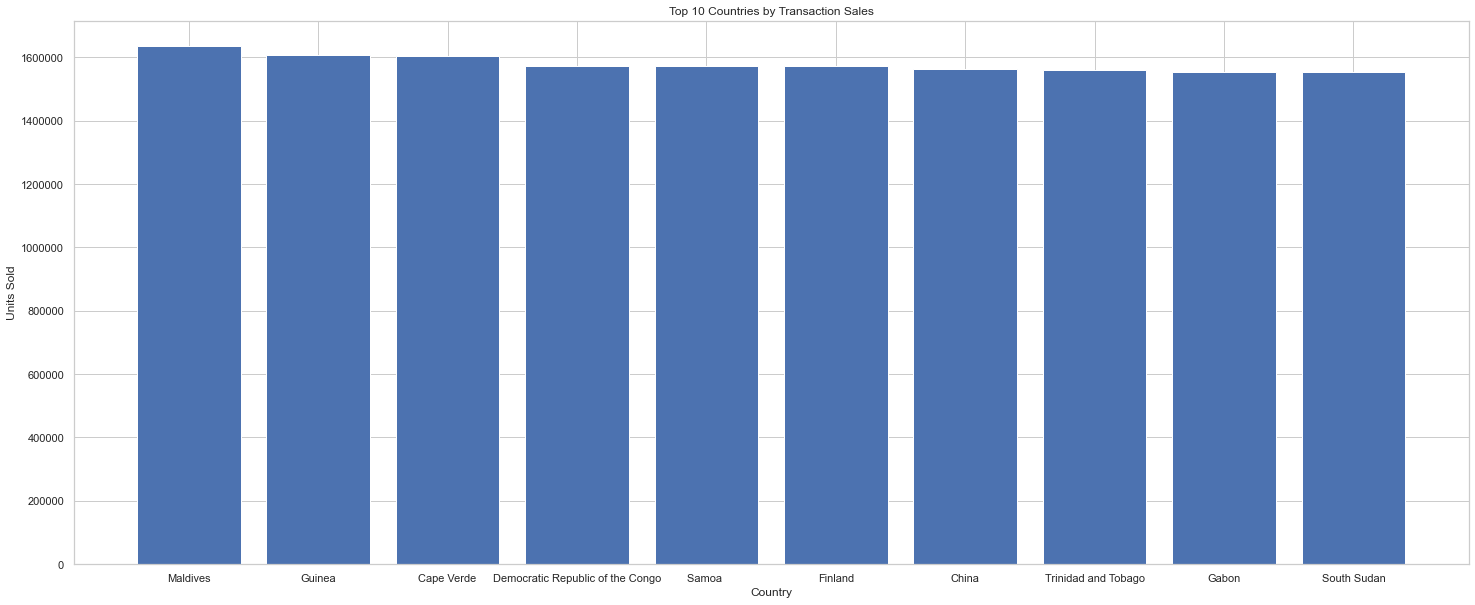

In [508]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,10))
# Country is x here and Units Sold is y
plt.bar(Top10UnitsCountry.Country, Top10UnitsCountry['Units Sold'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 10 Countries by Transaction Sales')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.show()

In [509]:
# 1b)

#This appends the results to a txt file and write the correct answer to the question where should we build a shipping center?
with open("MM_Rankings.txt", "w+") as writer:
    writer.writelines(Top10UnitsCountry.to_string(index = True))
    writer.writelines("\n")

In [510]:
with open("MM_Rankings.txt", "a+") as writer:
    writer.write("\nCountries Most Sale Transactions:\n")
index_country = Top10UnitsCountry.Country.tolist()
country = index_country
index_units = Top10UnitsCountry['Units Sold'].tolist()
unit = index_units
with open("MM_Rankings.txt", "a+") as writer:
    for x,y in zip(country, unit):
        writer.write(f"{x} : {y}\n")
    writer.write(f"The country we should build our shipping center is Finland because not only does Finland occupy a place in the top 10\n countries with the most sales transactions, but Finland is also in the next highest transaction region in Europe after\n Sub-Saharan Africa, which already has a shipping center in Guinea")

In [511]:
# 2-1)

#This determines the count of how many offline and online orders Marvel Market Recieves in the Sales Channel
print(f"Number of Offline Orders:")
print(cleanMM['Sales Channel'][cleanMM['Sales Channel'] == 'Offline'].count())
print(f"Number of Online Orders:")
print(cleanMM['Sales Channel'][cleanMM['Sales Channel'] == 'Online'].count())

Number of Offline Orders:
19790
Number of Online Orders:
30184


In [512]:
# 2-2)

#This determines the count of the unique priority codes
print(f"Number of L Priority Codes:")
print(cleanMM['Order Priority'][cleanMM['Order Priority'] == 'L'].count())
print(f"Number of M Priority Codes:")
print(cleanMM['Order Priority'][cleanMM['Order Priority'] == 'M'].count())
print(f"Number of H Priority Codes:")
print(cleanMM['Order Priority'][cleanMM['Order Priority'] == 'H'].count())
print(f"Number of C Priority Codes:")
print(cleanMM['Order Priority'][cleanMM['Order Priority'] == 'C'].count())

Number of L Priority Codes:
9984
Number of M Priority Codes:
19882
Number of H Priority Codes:
15096
Number of C Priority Codes:
5012


Order Priority
C     5012
H    15096
L     9984
M    19882
Name: Country, dtype: int64


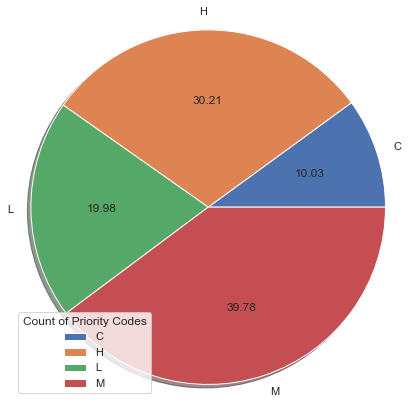

Sales Channel
Offline    19790
Online     30184
Name: Country, dtype: int64


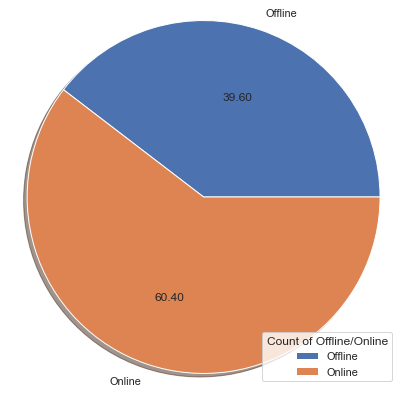

In [513]:
# 2-3)

#This creates a PieGraph for both OrderPriority and SalesChannel columns
#This is the Order Priority Pie Graph
MMCodes = cleanMM.groupby(['Order Priority']).count()
MMCodePrio = MMCodes['Country']

print(MMCodePrio)

plt.figure(figsize=(7, 7))
plt.pie(MMCodePrio, labels=MMCodePrio.index, shadow=True, autopct='%.2f')
plt.axis('equal')  # centers pie chart
plt.legend(loc=3, title='Count of Priority Codes')
plt.show()

#This is the Sales Channel Pie Graph
MMSales = cleanMM.groupby(['Sales Channel']).count()
MMChannel = MMSales['Country']

print(MMChannel)

plt.figure(figsize=(7, 7))
plt.pie(MMChannel, labels=MMChannel.index, shadow=True, autopct='%.2f')
plt.axis('equal')  # centers pie chart
plt.legend(loc=4, title='Count of Offline/Online')
plt.show()

In [514]:
#2-4)

#This writes the results of the past 3 questions into the MM_Rankings text by appending the sentences and results
with open("MM_Rankings.txt", "a+") as writer:
    writer.writelines("\n")
    writer.writelines(f"\nSales Channel:\nOnline: 30184\nOffline: 19790\nWe do more Online sales.\n")
    writer.writelines(f"\nOrder Priorities:\nL: 9984\nM: 19882\nH: 15096\nC: 5012\nWe do more M order priorities.\n")

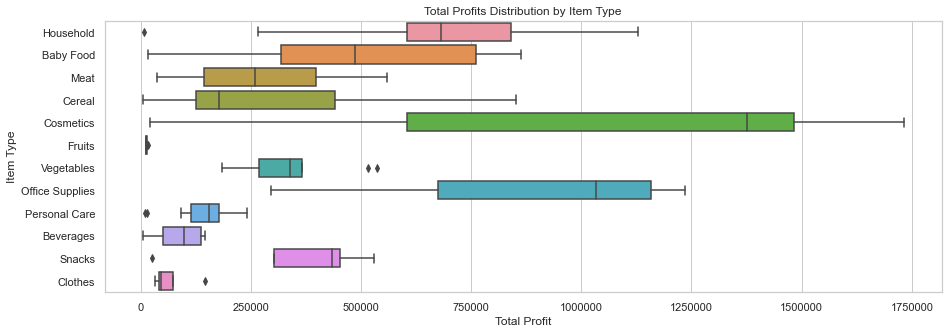

In [515]:
#3-1)

#This creates a boxplot showing the distribution of Total Profits by Item Type
plt.figure(figsize=(15, 5))
plt.title("Total Profits Distribution by Item Type")
plt.ticklabel_format(style='plain', axis='x')
ax = sns.boxplot(cleanMM['Total Profit'], cleanMM['Item Type'][0:100])

In [516]:
#3-2)

#This determines the sum of the Total Profit by each unique Item Type and orders them by ascending order.
TotalProfitItem = cleanMM.groupby('Item Type').agg({'Total Profit': 'sum'}).reset_index()
SortedTotalProfitItem = TotalProfitItem.sort_values(by=['Total Profit'], ascending = False)
print(SortedTotalProfitItem)

          Item Type   Total Profit
4         Cosmetics 3638645299.300
6         Household 3401180998.060
8   Office Supplies 2605440187.500
0         Baby Food 1942865748.120
2            Cereal 1824726412.290
3           Clothes 1520832019.680
11       Vegetables 1322639660.240
7              Meat 1196826774.000
10           Snacks 1149715758.720
9     Personal Care  535250525.600
1         Beverages  327559249.080
5            Fruits   51025156.240


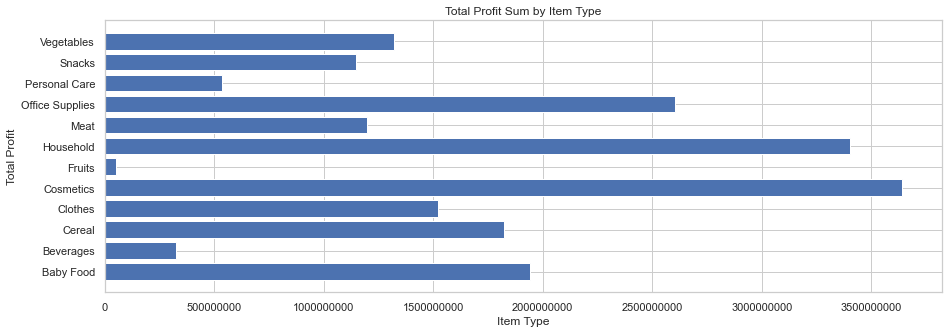

In [517]:
#3-3)

#This creates a bargraph of the total profit sum by item type.
plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='x')
plt.barh(TotalProfitItem['Item Type'], TotalProfitItem['Total Profit'])
plt.title('Total Profit Sum by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.show()

In [518]:
#3-4)

#This ranks the top three item types in most sales to least sales order according to the total profits column.
TotalProfitItem = cleanMM.groupby('Item Type').agg({'Total Profit': 'sum'}).reset_index()
SortedTotalProfitItem = TotalProfitItem.sort_values(by=['Total Profit'], ascending = False)
print(f"{SortedTotalProfitItem}\n")
print("This is the Top 3 Item Types by Highest Total Profit:\n")
Top3profitItem = TotalProfitItem.nlargest(3, ['Total Profit'])
print(Top3profitItem)

          Item Type   Total Profit
4         Cosmetics 3638645299.300
6         Household 3401180998.060
8   Office Supplies 2605440187.500
0         Baby Food 1942865748.120
2            Cereal 1824726412.290
3           Clothes 1520832019.680
11       Vegetables 1322639660.240
7              Meat 1196826774.000
10           Snacks 1149715758.720
9     Personal Care  535250525.600
1         Beverages  327559249.080
5            Fruits   51025156.240

This is the Top 3 Item Types by Highest Total Profit:

         Item Type   Total Profit
4        Cosmetics 3638645299.300
6        Household 3401180998.060
8  Office Supplies 2605440187.500


In [519]:
#3-5)

#This writes the top 3 Item Types into the MM_Rankings.txt file
with open("MM_Rankings.txt", "a+") as writer:
    writer.writelines(f"\nHighest Selling Items:\nCosmetics: $3,648,645,299.3\nHousehold: $3,401,180,998.06\nOffice Supplies: $2,605,440,187.5\nWe profited from Cosmetics the most.\n")

# 3-6)
# This is a markdown section that is analyzing the results of the boxplots.
With the data derived from the Total Profit grouped by Item Type, we find out that the 3 most profitable items were cosmetics, then households, and finally office supplies. But on top on that by looking at the ascending order of total profit we also see the next three item types are Baby Foods, Cereal, and Clothes which all sit comfortably around 1,5-2 trillion. With Cosmetics and Office Supplies holding medians and spreads well above the other item types, this makes me believe there is a relation between the range and median of the total profits per transactions and the total profit a item type will result in. This makes me want to consider the opportunity of the item type clothes. Clothes currently hold a position in the top 6 most most profiting item types by total profit, but in the box plot, the clothes median and range is one of the lowest only a little higher than fruits. If the pattern of returning profits per transaction were increase to the range of lets say snacks, and the median was increased to meet that range, then perhaps the total profits of clothes flourish to be one of the highest returns of all item types. As these are medians of profit per transaction, that could possibly mean that Marvel Mart is selling clothes too cheap and with a little increase, they could make a bigger profit from clothes. On the other hand, fruits is most definitely struggling in the Marvel Mart. This might be because the idea of fresh produce might not be the most relatable to 'Marvel' but at the same time fruits tend to also have a shorter lifespan even when refrigerated, which makes it hard to sell when its rotting faster that persay vegetables and meats. This might have contributed to its low total profits. Overall if Marvel can continue to leverage their cosmetics, households, and office supplies while figuring out ways to leverage the low median total price per transaction of clothes they should be able to further increase their revenue if total profit has some form of relationship with increasing their clothing selling costs.

In [520]:
#4-1)

#This shows the SUM of the requested columnns: Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profits.
print("Total Units Sold:")
TotalUnitsSold = cleanMM['Units Sold'].sum()
print (f"{TotalUnitsSold}\n")
print("Total Units Cost:")
TotalUnitCost = cleanMM['Unit Cost'].sum()
print (f"{TotalUnitCost}\n")
print("Sum of Total Revenue:")
SumRevenue = cleanMM['Total Revenue'].sum()
SumRevenue = str(round(SumRevenue, 2))
print (f"{SumRevenue}\n")
print("Sum of Total Cost:")
SumCosts = cleanMM['Total Cost'].sum()
SumCosts = str(round(SumCosts, 2))
print (f"{SumCosts}\n")
print("Sum of Total Profits:")
SumProfits = cleanMM['Total Profit'].sum()
SumProfits = str(round(SumProfits, 2))
print (SumProfits)

Total Units Sold:
249834035

Total Units Cost:
9361403.26

Sum of Total Revenue:
66149230224.85

Sum of Total Cost:
46632522436.02

Sum of Total Profits:
19516707788.83


In [451]:
#4-2)

#This shows the Mean/Average of the requested columnns: Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profits.
print("Mean Units Sold:")
MeanUnitsSold = cleanMM['Units Sold'].mean()
MeanUnitsSold = str(round(MeanUnitsSold, 2))
print (f"{MeanUnitsSold}\n")
print("Mean Units Cost:")
MeanUnitCost = cleanMM['Unit Cost'].mean()
MeanUnitCost = str(round(MeanUnitCost, 2))
print (f"{MeanUnitCost}\n")
print("Mean of Total Revenue:")
MeanRevenue = cleanMM['Total Revenue'].mean()
MeanRevenue = str(round(MeanRevenue, 2))
print (f"{MeanRevenue}\n")
print("Mean of Total Cost:")
MeanCosts = cleanMM['Total Cost'].mean()
MeanCosts = str(round(MeanCosts, 2))
print (f"{MeanCosts}\n")
print("Mean of Total Profits:")
MeanProfits = cleanMM['Total Profit'].mean()
MeanProfits = str(round(MeanProfits, 2))
print (MeanProfits)

Mean Units Sold:
4999.28

Mean Units Cost:
187.33

Mean of Total Revenue:
1323672.91

Mean of Total Cost:
933135.68

Mean of Total Profits:
390537.24


In [452]:
#4-3)

#This shows the Maximum of the requested columnns: Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profits.
print("Max Units Sold:")
MaxUnitsSold = cleanMM['Units Sold'].max()
print (f"{MaxUnitsSold}\n")
print("Max Units Cost:")
MaxUnitCost = cleanMM['Unit Cost'].max()
print (f"{MaxUnitCost}\n")
print("Max of Total Revenue:")
MaxRevenue = cleanMM['Total Revenue'].max()
print (f"{MaxRevenue}\n")
print("Max of Total Cost:")
MaxCosts = cleanMM['Total Cost'].max()
print (f"{MaxCosts}\n")
print("Max of Total Profits:")
MaxProfits = cleanMM['Total Profit'].max()
print (MaxProfits)

Max Units Sold:
10000

Max Units Cost:
524.96

Max of Total Revenue:
6682031.73

Max of Total Cost:
5249075.04

Max of Total Profits:
1738178.39


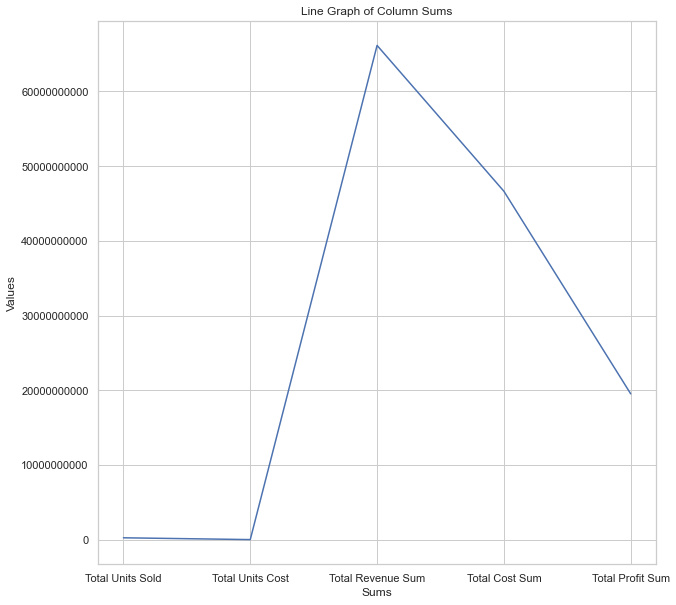

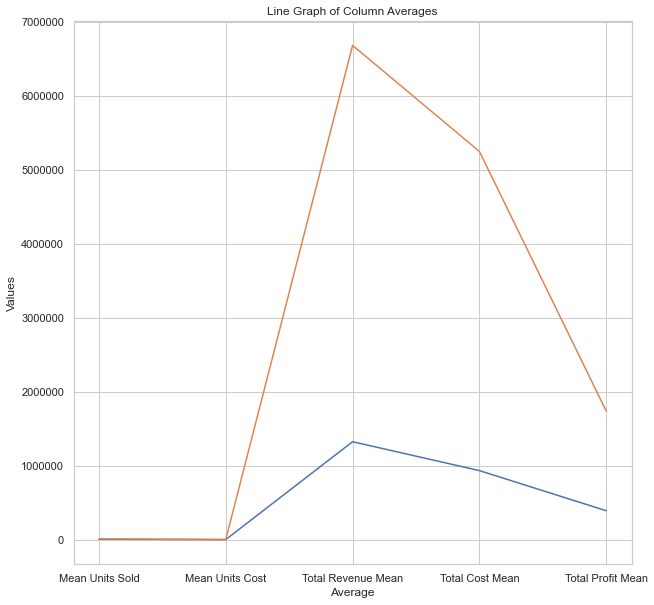

In [443]:
#4-4)

#This creates two line graphs one for SUM and one for Average
#This is the line graph for the Sums
plt.figure(figsize=(10, 10))
plt.ticklabel_format(style='plain', axis='y')
plt.plot(['Total Units Sold', 'Total Units Cost', 'Total Revenue Sum', 'Total Cost Sum', 'Total Profit Sum'], [249834035, 9361403.26, 66149230224.85, 46632522436.02, 19516707788.83])
plt.title('Line Graph of Column Sums')
plt.xlabel('Sums')
plt.ylabel('Values')
plt.show()

#This is the line graph for the Averages
plt.figure(figsize=(10, 10))
plt.ticklabel_format(style='plain', axis='y')
plt.plot(['Mean Units Sold', 'Mean Units Cost', 'Total Revenue Mean', 'Total Cost Mean', 'Total Profit Mean'], [4999.28, 187.33, 1323672.91, 933135.68, 390537.24], [10000, 524.96, 6682031.73, 5249075.04, 1738178.39])
plt.title('Line Graph of Column Averages')
plt.xlabel('Average')
plt.ylabel('Values')
plt.show()

In [444]:
#4-5)

#This appends the results of the Sums, averages, and max, to the MM_Rankings.txt file
with open("MM_Calc.txt", "w") as writer:
    writer.write(f"\nSums:\nUnits Sold: 249,834,035\nUnit Cost: $9,361,403.26\nTotal Revenue: $66,149,230,224.85\nTotal Cost: $46,632,522,436.02\nTotal Profit: $19,516,707,788.83\n")
    writer.write(f"\nAverages:\nUnits Sold: 4,999.28\nUnit Cost: $187.33\nTotal Revenue: $1,323,672.91\nTotal Cost: $933.135.68\nTotal Profit: $390,537.24\n")
    writer.write(f"\nMaximums:\nUnits Sold: 10,000\nUnit Cost: $524.96\nTotal Revenue: $6,682,031.73\nTotal Cost: $5,249,075.04\nTotal Profit: $1,738,178.39\n")

Part 3: Cross-Reference Statistics

In [445]:
#1

#This creates a list of the Regions and its cities with no duplicate regions nor country
regionNcountry = cleanMM.groupby('Region')['Country'].unique()
print(regionNcountry)

Region
Asia                                 [Indonesia, India, South Korea, Kazakhstan, Mo...
Australia and Oceania                [Tuvalu, Samoa , Fiji, Marshall Islands, New Z...
Central America and the Caribbean    [Antigua and Barbuda , Saint Kitts and Nevis ,...
Europe                               [Iceland, Russia, Moldova , Malta, Greece, Ukr...
Middle East and North Africa         [Turkey, Iraq, Kuwait, Tunisia , Yemen, United...
North America                        [Greenland, United States of America, Canada, ...
Sub-Saharan Africa                   [Namibia, Djibouti, Cameroon, Nigeria, Senegal...
Name: Country, dtype: object


In [523]:
#2-1)

#This converts the list of region and countries and convert it to a dictionary that can be put in a pandas dataframe.
regionNcountry = pd.read_csv("MM_Sales_Clean.csv")[["Region", "Country"]]
print(regionNcountry)
Regions = regionNcountry["Region"].unique()
print(Regions)
convertdictionary = {}
for region in Regions:
    convertdictionary[region] = regionNcountry[regionNcountry["Region"].eq(region)]["Country"]
    print(convertdictionary[region])
    convertdictionary[region] = convertdictionary[region].unique()
print(convertdictionary[region])
createDF = [pd.DataFrame({key : convertdictionary[key]}) for key in convertdictionary.keys()]
regionNcountry = pd.concat(createDF, axis = 1)
print(regionNcountry)

                                  Region             Country
0                     Sub-Saharan Africa             Namibia
1                                 Europe             Iceland
2                                 Europe              Russia
3                                 Europe            Moldova 
4                                 Europe               Malta
...                                  ...                 ...
49969  Central America and the Caribbean  Dominican Republic
49970  Central America and the Caribbean                Cuba
49971                               Asia             Vietnam
49972                 Sub-Saharan Africa        Sierra Leone
49973                 Sub-Saharan Africa             Eritrea

[49974 rows x 2 columns]
['Sub-Saharan Africa' 'Europe' 'Asia' 'Middle East and North Africa'
 'Central America and the Caribbean' 'Australia and Oceania'
 'North America']
0             Namibia
6            Djibouti
8            Cameroon
9             Nigeria
10    

In [447]:
#2-2)

#This codes the database into a csv file named Countries By Region
regionNcountry.to_csv("Countries_By_Region.csv")